#### Key metrics:

- **Equity Curve**: Visual representation of account value over time. A smooth upward slope is preferable, indicating consistent gains for a long strategy; a downward trend might suggest profitable opportunities for short selling if managed strategically.

- **CAGR (Compound Annual Growth Rate)**: Measures the mean annual growth rate of an investment over a specified time period longer than one year. Higher CAGR indicates a potentially profitable long strategy; a declining CAGR could inform a successful short strategy.

- **Rolling Max Drawdown (RDD)**: Peak to trough decline measured from the equity curve's high over a specific time window. Lower RDD indicates resilience in the portfolio, which is advantageous for long strategies; higher RDD may necessitate hedging or could inform short strategies.

- **Net Profit/Loss**: The total profit or loss of a portfolio after all gains and losses are accounted for. Positive net profit supports long strategies; net losses, while unfavorable, could be leveraged in short strategies.

- **Profit Factor**: Ratio of gross profits to gross losses. A high profit factor above 1.75 suggests effective risk management suitable for long strategies; extremely high values might indicate over-optimism and necessitate caution.

- **Average Win-to-Loss Ratio**: Ratio of winning trades to losing trades. A high ratio supports the viability of long strategies by reducing risk; a lower ratio might be leveraged in selective short strategies to capitalize on failing assets.

- **ROI (Return on Investment)**: Percentage of return on the invested amount in a specific period. Higher ROI enhances long position performance; low or negative ROI may guide strategies towards short positions or necessitate portfolio reassessment.

- **Sharpe Ratio**: Measures risk-adjusted returns, comparing excess returns to the risk-free rate. A Sharpe ratio greater than 0.75 is good for long positions, showing efficient risk management; values much higher than 1.5 may require scrutiny for volatility risk.

- **Annual Average Daily Returns**: Average of daily return percentages over a year. High, stable daily returns support long strategies; erratic or low returns might guide more speculative or short-term strategies including shorts.

- **Volatility**: Statistical measure of the dispersion of returns for a security or index. Lower volatility is generally preferable for long-term investments; higher volatility may suit traders looking to exploit short-term market movements through both long and short strategies.

- **Correlation**: Measures how securities move in relation to each other. Low correlations among portfolio securities aid in diversification and risk management for long strategies; high correlations can inform strategic hedging or be used to reinforce positions, both long and short, in correlated assets.


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Assuming your notebook is in the root directory and src is also in root directory
src_dir = os.path.join(os.getcwd(), 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)
    
from trade_performance import calculate_trade_performance, get_ticker_price

from utility import parse_amount, print_repeated_strings

In [82]:
file_path = './data/testData.csv'
trades_data = pd.read_csv(file_path)
trades_data.head()

,disclosureYear,disclosureDate,transactionDate,owner,ticker,assetDescription,type,amount,representative,district,capitalGainsOver200USD,option_symbol
0,2023,6/15/2023,5/20/2023,Spouse,AAPL,Apple Inc. Stock,Purchase,"$100,001 - $250,000",Nancy Pelosi,CA-12,Yes,NaN
1,2023,5/12/2023,4/10/2023,Self,GOOGL,Alphabet Inc. Stock,Sale (Full),"$50,001 - $100,000",Nancy Pelosi,CA-12,No,NaN
2,2023,12/29/2023,12/6/2022,Dependent,AMZN,AMZN Stock,Purchase,"$100,001 - $250,000",Nancy Pelosi,NY-14,Yes,NaN
3,2023,2/13/2022,4/14/2022,Self,AMZN,AMZN Stock,Purchase,"$100,001 - $250,000",Nancy Pelosi,FL-9,No,NaN
4,2023,6/23/2023,3/11/2022,Joint,MSFT,MSFT Stock,Purchase,"$1,001 - $15,000",Nancy Pelosi,CA-12,Yes,NaN


In [83]:
# Preprocessing the data
trades_data['Date'] = pd.to_datetime(trades_data['transactionDate'])
type_mapping = {'Purchase': 'buy', 'Sale (Full)': 'sell full', 'Sale (Partial)': 'sell partial'}
trades_data['Side'] = trades_data['type'].map(type_mapping)
trades_data['Price'] = get_ticker_price(len(trades_data), seed=0) # Arbitrary fixed price
trades_data['Size'] = trades_data['amount'].apply(parse_amount) / trades_data['Price']

trades_data = trades_data[['Date', 'ticker', 'Side', 'Size', 'Price']].copy().reset_index(drop=True)
trades_data.rename(columns={'ticker': 'Symbol'}, inplace=True)
trades_data.head(5)

,Date,Symbol,Side,Size,Price
0,2023-05-20,AAPL,buy,547.688851,319.525402
1,2023-04-10,GOOGL,sell full,194.263692,386.075747
2,2022-12-06,AMZN,buy,513.039446,341.105350
3,2022-04-14,AMZN,buy,550.396913,317.953273
4,2022-03-11,MSFT,buy,29.690652,269.461920


In [84]:
metrics = calculate_trade_performance(trades_data)
print(f"Total number of metrics: {len(metrics.keys())},\nMetrics are: {list(metrics.keys())}")

All required columns are present.
Total number of metrics: 11,
Metrics are: ['Equity curves', 'CAGR', 'RMDD', 'Net P/L in $', 'Profit factor', 'Win-to-loss ratio', 'ROI', 'Rolling Sharpe ratio', 'Annualized volatility', 'Annualized returns', 'Correlation']


### Equity curve

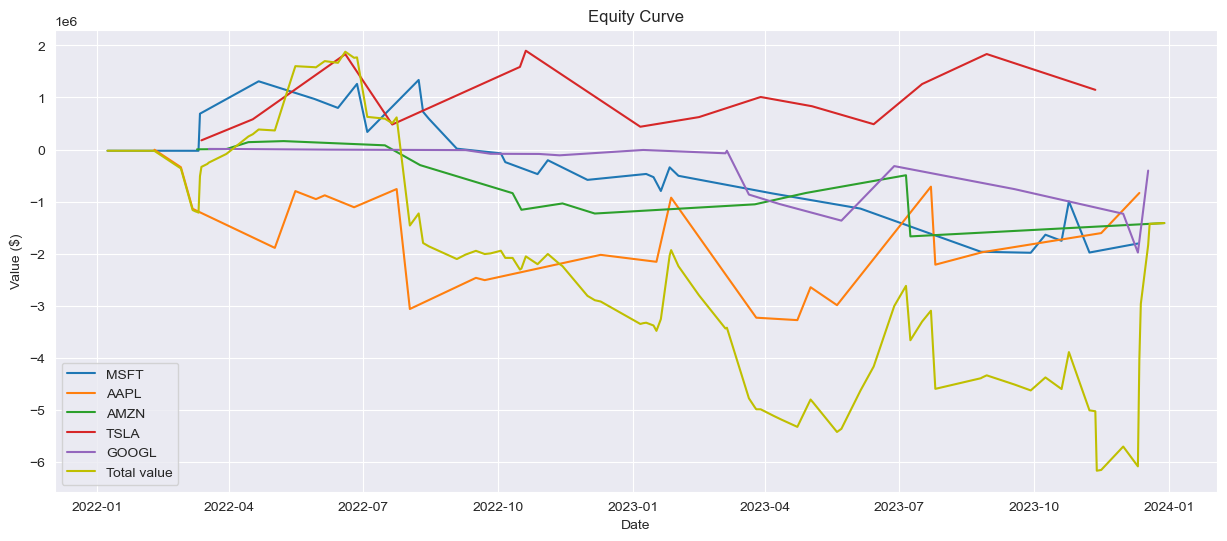

In [85]:
equity_curve = metrics['Equity curves']

plt.figure(figsize=(15, 6))

for cols in equity_curve.columns:
    if cols == 'Total value':
        plt.plot(equity_curve['Date'], equity_curve[cols], 'y-', label=cols)
    elif cols != 'Date' and cols != 'Total value':
        plt.plot(equity_curve['Date'], equity_curve[cols], '-', label=cols)
plt.title('Equity Curve')
plt.ylabel('Value ($)')
plt.xlabel('Date')
plt.legend()
plt.show()

The total equity curve shows an overall downward trend, indicating that either more selling occurred than buying securities (volume based fluctuations) or market values of securities reduced by a big margin (price based fluctuations) or both occurred simultaneously.

### Compound Annual Growth Rate

In [86]:
print(f'The CAGR for the portoflio over its entire duration is: {metrics["CAGR"]}%')

The CAGR for the portoflio over its entire duration is: -43.02%


The CAGR value shows negative compound growth rate over the entire duration of the trades, based on total investment (cost) vs final portfolio value.

### Rolling monthly MaxDrawdown

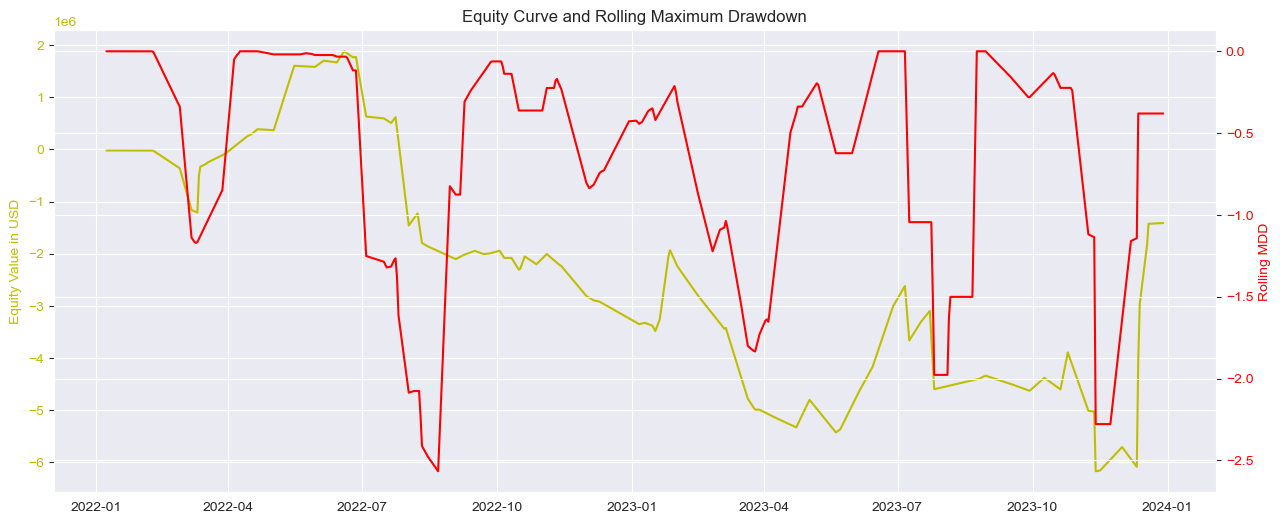

In [87]:
rmdd = metrics['RMDD']

plt.figure(figsize=(15, 6))

# Create first axes
ax1 = plt.gca()  # Gets the current axes instance
ax1.plot(equity_curve['Date'], equity_curve['Total value'], label='Equity Curve', color='y')  
ax1.set_ylabel('Equity Value in USD', color='y')  # Set the label and color for y-axis
ax1.tick_params(axis='y', labelcolor='y')  # Set the y-tick color

# Create second axes sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(equity_curve['Date'], rmdd, label='Rolling MDD', color='r')  
ax2.set_ylabel('Rolling MDD', color='r')  # Set the label and color for the secondary y-axis
ax2.tick_params(axis='y', labelcolor='r')  # Set the y-tick color for the secondary axis

plt.title('Equity Curve and Rolling Maximum Drawdown')

plt.show()

The value of monthly rolling MDD is above -2.5% during most of the trade duration, which indicates a trading strategy that accounts for risks well.

### Net Profit/Loss

In [88]:
print_repeated_strings(metrics['Net P/L in $'], 'Net P/L in $')

Net P/L in $ for all trades: -1674377.454
Net P/L in $ for long trades: -2215119.878
Net P/L in $ for short trades: 540742.424


The net loss (= market value - transaction costs) for the entire trade is USD 1.6M. The short trades resulted in net profit of USD 0.54M while the long trades resulted in net loss of USD 2.2M

### Profit Factor

In [89]:
print_repeated_strings(metrics['Profit factor'], 'Profit factor')

Profit factor for all trades: 0.595
Profit factor for long trades: 0.427
Profit factor for short trades: 2.997


The profit factor for the entire trade is 0.59 which indicates a risky overall strategy. The short trades resulted in profit factor of 3 while the long trades resulted in profit factor of 0.42, indicating a better risk-adjusted short trading strategy compared to long ones.

### Average Win-to-Loss Ratio

In [90]:
print_repeated_strings(metrics['Win-to-loss ratio'], 'Win-to-loss ratio')

Win-to-loss ratio for all trades: 0.550
Win-to-loss ratio for long trades: 0.490
Win-to-loss ratio for short trades: 1.577


The Win-to-loss ratio for the entire trade is 0.55, and indicates that the short trades with ratio of 1.58 capitalized well on failing securities, while long ones with ratio 0.49 did not do well.

### ROI (Return on Investment)

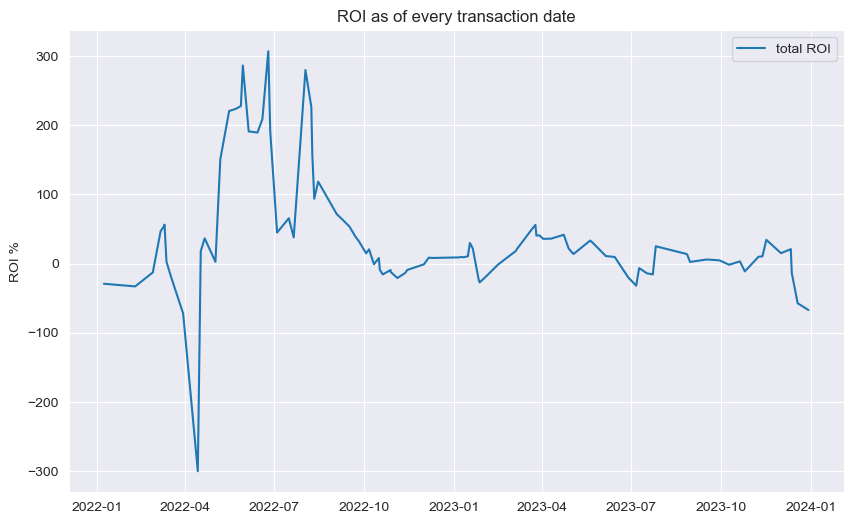

In [91]:
ROI, roi_long, roi_short = metrics['ROI']['all'], metrics['ROI']['long'], metrics['ROI']['short']

plt.figure(figsize=(10, 6))
plt.plot(ROI.index, ROI['ROI'], '-', label='total ROI')
plt.ylabel('ROI %')
plt.legend()
plt.title('ROI as of every transaction date')
plt.show()

The ROI (investment amount as percentage of portfolio value as function of time) for all trades and all securities shows mostly positive return %s. 

Winning-to-loss ROI ratio for long trades: 2.130434782608696
Winning-to-loss ROI ratio for short trades: 3.1428571428571423


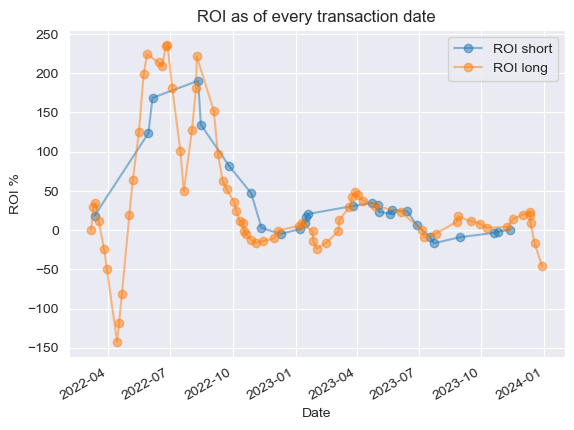

In [92]:
print(f"Winning-to-loss ROI ratio for long trades: {metrics['ROI']['w2l_ROI_long']}")
print(f"Winning-to-loss ROI ratio for short trades: {metrics['ROI']['w2l_ROI_short']}")

roi_short.plot(marker='o',label='ROI short', alpha=0.5)
roi_long.plot(marker='o',label='ROI long', alpha=0.5)
plt.ylabel('ROI %')
plt.title('ROI as of every transaction date')
plt.legend()
plt.show()

However, ROI bucketed on short and long strategies shows that shorting outperformed the long positions with higher win-to-loss ROI ratios over the entire duration of the portfolio.

### Rolling 6-month Sharpe Ratio

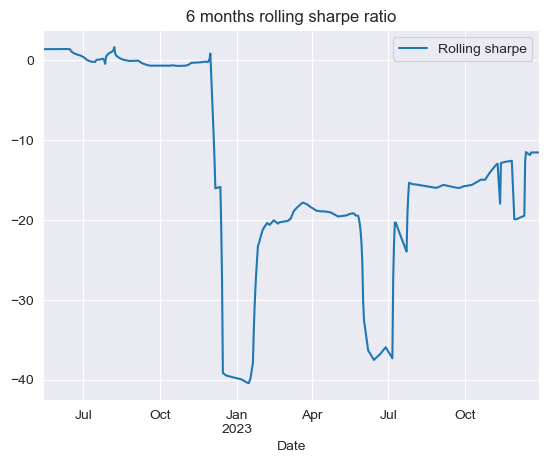

In [93]:
rolling_sharpe = metrics['Rolling Sharpe ratio']

rolling_sharpe.plot(x='Date')
plt.title('6 months rolling sharpe ratio')
plt.legend()
plt.show()

The rolling Sharpe ratio shows an abysmal value below typical industry standards of 0.75.

### Annualized Averaged Daily Returns for each traded security and total value

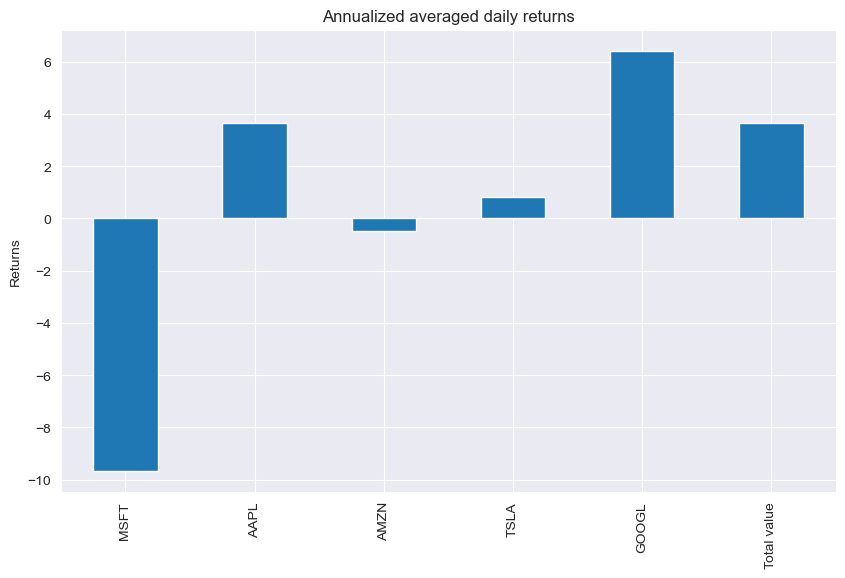

In [94]:
annualized_returns = metrics['Annualized returns']

# Volatility Bar Chart
plt.figure(figsize=(10, 6))
annualized_returns.plot(kind='bar')
plt.title('Annualized averaged daily returns')
plt.ylabel('Returns')
plt.show()

Google securities had highest annualized averaged daily returns and Microsoft securities had that lowest.

### Annualized Volatility for each traded security and total value

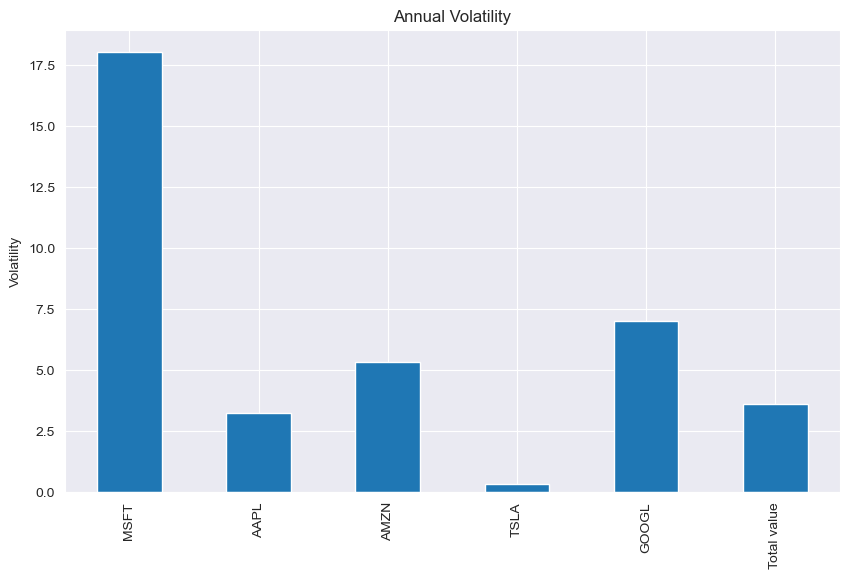

In [95]:
annualized_volatility = metrics['Annualized volatility']

# Volatility Bar Chart
plt.figure(figsize=(10, 6))
annualized_volatility.plot(kind='bar')
plt.title('Annual Volatility')
plt.ylabel('Volatility')
plt.show()


For the given portfolio, Microsoft securities showed very high annualized volatility in returns while Tesla securities showed the lowest. 

### Correlations between traded securities

Number of positive to negative correlations (unique pairs): 2.33
Portfolio is not diverse.

           MSFT      AAPL      AMZN      TSLA     GOOGL
MSFT   1.000000  0.031174 -0.006640 -0.001236  0.030384
AAPL   0.031174  1.000000  0.046165  0.077098  0.021873
AMZN  -0.006640  0.046165  1.000000  0.048907 -0.001810
TSLA  -0.001236  0.077098  0.048907  1.000000  0.035448
GOOGL  0.030384  0.021873 -0.001810  0.035448  1.000000


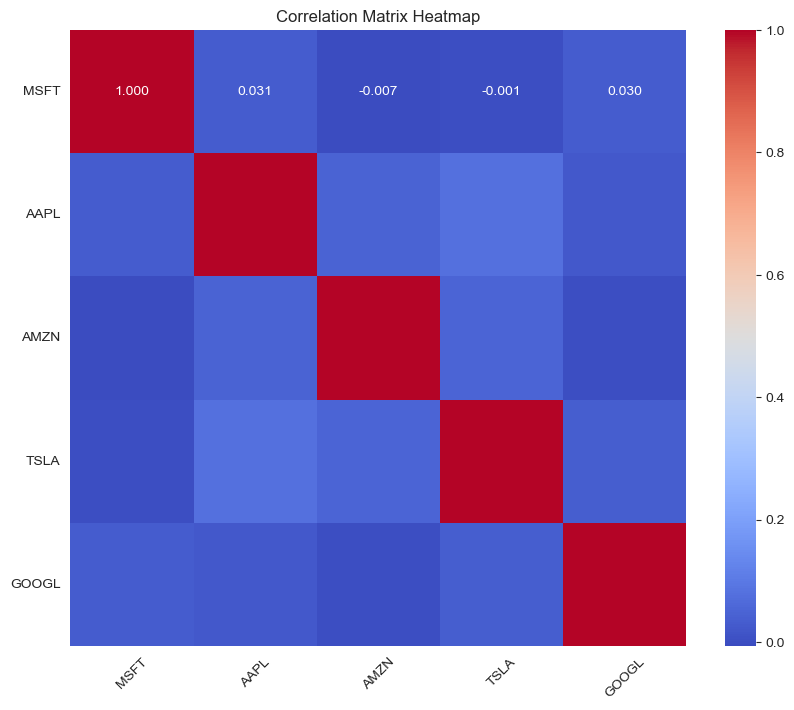

In [96]:
# Correlation Matrix Heatmap
correlation_matrix = metrics['Correlation']['matrix']
pos_neg_corr_ratio = metrics['Correlation']['pos_neg_corr_ratio']
verdict = metrics['Correlation']['verdict']


print("Number of positive to negative correlations (unique pairs):", pos_neg_corr_ratio)
print(verdict)
print(correlation_matrix)

plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.show()

The portfolio wasn't very diverse as there were more positively correlated assets than negatively correlated pairs. 

In conclusion, the portfolio had profitable short strategies and very lossy long positions. It capitalized well on shorted securities. However, there were room for diversification and better long strategies based on further research on market trends of the securities. 